## Welcome to Hands On P4!

Pada Hands On kali ini, kita akan mempelajari Exploratory Data Analysis.

Dataset yang digunakan adalah Car Price Prediction | https://www.kaggle.com/datasets/hellbuoy/car-price-prediction

#### Business Goal
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

In [2]:
# import dataset
df = pd.read_csv('CarPrice_Assignment.csv')

In [3]:
# quick review dengan menampilkan 5 baris data
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
# pengecekan tipe data kolom dan missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

### Data Cleansing

In [5]:
# hapus kolom car_ID karena tidak akan digunakan dalam proses
df = df.drop(['car_ID'], axis=1)

In [6]:
# mengganti tipe data kolom 'symboling' menjadi object
# hal ini diperlukan karena pada dokumentasi dataset disebutkan bahwa kolom `symboling` memiliki tipe data object.

df['symboling'] = df['symboling'].astype('str')

In [8]:
# mengambil nama merk mobil dari kolom 'CarName'
df['CarName'] = df['CarName'].str.split(' ', expand=True)[0]

In [9]:
df.CarName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [10]:
# membersihkan data duplikat pada kolom CarName
df['CarName'] = df['CarName'].replace({'maxda': 'mazda', 'Nissan': 'nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 
                            'vokswagen': 'volkswagen', 'vw': 'volkswagen'})
df.CarName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

### Visualization

#### 1. Univariat Analysis

Text(0.5, 0, 'Price')

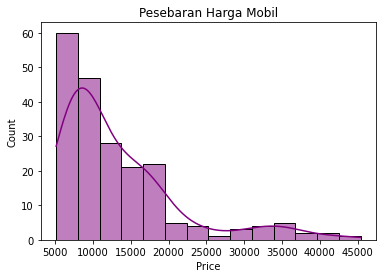

In [11]:
# melihat pesebaran data menggunakan Histogram
fig = plt.figure()
ax = sns.histplot(x=df['price'], kde=True, color='purple')

plt.title("Pesebaran Harga Mobil")
plt.xlabel("Price")

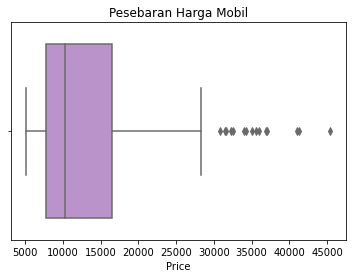

In [12]:
# melihat pesebaran data menggunakan boxplot
fig = plt.figure()
ax = sns.boxplot(x='price', data=df, color='#bd8ad4')

plt.title("Pesebaran Harga Mobil")
plt.xlabel("Price")

plt.show()

*   Pesebaran data `price` right-skewed
*   Terdapat beberapa outliers
*   Data banyak tersebar di rentang 5000 - 20000

Text(0, 0.5, 'Merek Mobil')

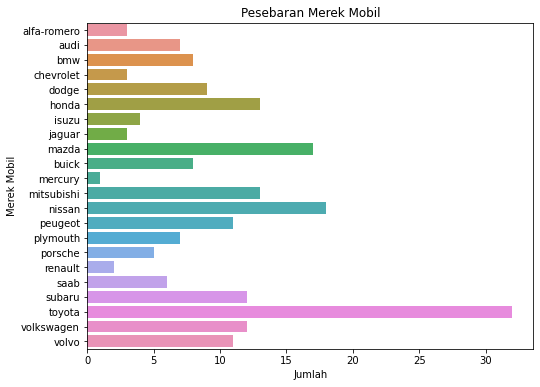

In [13]:
# pesebaran data merek mobil
fig = plt.figure(figsize=(8, 6))
ax = sns.countplot(y=df['CarName'])

plt.title("Pesebaran Merek Mobil")
plt.xlabel("Jumlah")
plt.ylabel("Merek Mobil")

#### 2. Bivariate Analysis

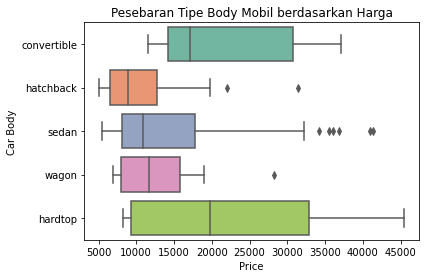

In [14]:
# Bivariate, Categorical vs Numerical
# Pesebaran Tipe Body Mobil berdasarkan Harga

fig = plt.figure()
ax = sns.boxplot(y = 'carbody', x = 'price', data = df, palette = 'Set2')
plt.title("Pesebaran Tipe Body Mobil berdasarkan Harga")
plt.xlabel("Price")
plt.ylabel("Car Body")

plt.show()

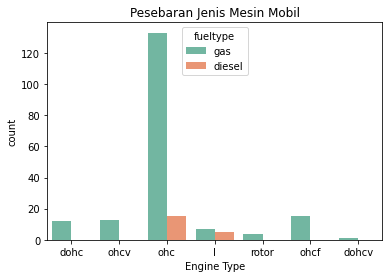

In [15]:
# Bivariate, Categorical vs Categorical
# Pesebaran Jenis Mesin Mobil dengan tipe bahan bakar

fig = plt.figure()
ax = sns.countplot(x = 'enginetype', data = df, hue = 'fueltype', palette = 'Set2')
plt.title("Pesebaran Jenis Mesin Mobil")
plt.xlabel("Engine Type")

plt.show()

Text(0, 0.5, 'Price')

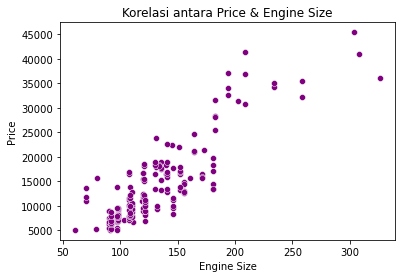

In [16]:
# Bivariate, numerical vs numerical
# Korelasi harga dengan engine size mobil

sns.scatterplot(x = df['enginesize'], y = df["price"], data = df, color = 'purple')
plt.title("Korelasi antara Price & Engine Size")
plt.xlabel('Engine Size')
plt.ylabel("Price")

Text(0, 0.5, 'Price')

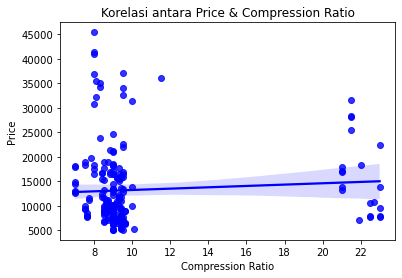

In [17]:
# Bivariate, numerical vs numerical
# Korelasi harga dengan engine size mobil

sns.regplot(x = df['compressionratio'], y = df["price"], data = df, color = 'blue')
plt.title("Korelasi antara Price & Compression Ratio")
plt.xlabel('Compression Ratio')
plt.ylabel("Price")

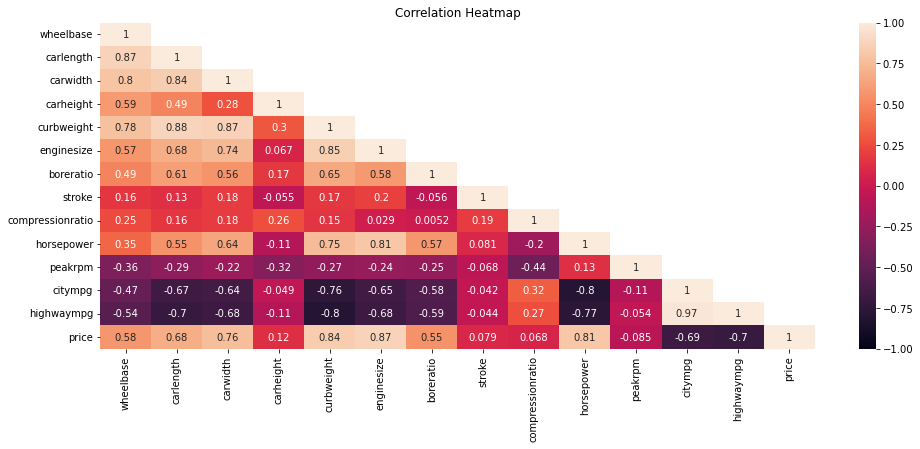

In [18]:
# Bivariate Num vs Num
# visualisasi correlation setiap kolom numerik menggunakan heatmap
plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, mask=np.triu(df.corr(), k=1))
heatmap.set_title('Correlation Heatmap');

#### 3. Multivariate Analysis

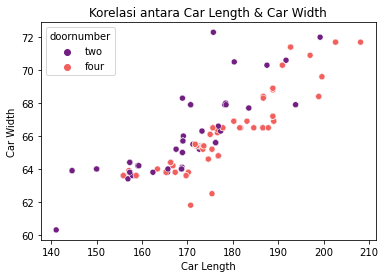

In [19]:
# visualisasi lebih lanjut antara kolom carlength, carwidth dan jumlah pintu
fig = plt.figure()  
ax = sns.scatterplot(data = df, x = 'carlength', y = 'carwidth', hue = 'doornumber', palette = 'magma')

plt.xlabel("Car Length")
plt.ylabel("Car Width")
plt.title("Korelasi antara Car Length & Car Width")

plt.show() 

<Figure size 432x288 with 0 Axes>

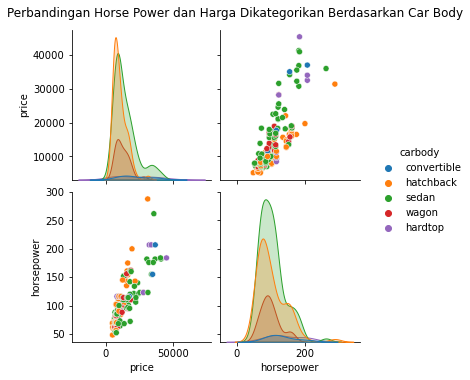

In [102]:
# visualisasi kolom horsepower dan price dengan hue carbody
fig = plt.figure()
ax = sns.pairplot(df[['price','horsepower','carbody']], hue="carbody");
ax.fig.suptitle("Perbandingan Horse Power dan Harga Dikategorikan Berdasarkan Car Body", y=1.04)
plt.show()

### Checking Outliers

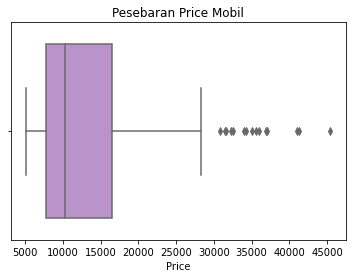

In [24]:
# melihat pesebaran data menggunakan boxplot
fig = plt.figure()
ax = sns.boxplot(x='price', data=df, color='#bd8ad4')

plt.title("Pesebaran Price Mobil")
plt.xlabel("Price")

plt.show()

In [25]:
# Cek outliers menggunakan Z-Score
df[(np.abs(stats.zscore(df['price'])) >= 3)]

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
16,0,bmw,gas,std,two,sedan,rwd,front,103.5,193.8,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315.0
73,0,buick,gas,std,four,sedan,rwd,front,120.9,208.1,...,308,mpfi,3.80,3.35,8.0,184,4500,14,16,40960.0
74,1,buick,gas,std,two,hardtop,rwd,front,112.0,199.2,...,304,mpfi,3.80,3.35,8.0,184,4500,14,16,45400.0


In [26]:
# Hapus baris data yang memiliki outliers
df_clean = df[(np.abs(stats.zscore(df['price'])) < 3)]

### Feature Engineering

Beberapa teknik dasar feature engineering di antaranya:
- Encoding
- Binning
- Normalization

In [27]:
# Binning, mengelompokkan harga

# buat fungsi pengelompokkan harga
def price_classifier(x):
    if x < 15000:
        return 'Low'
    elif x < 30000:
        return 'Normal'
    elif x < 40000:
        return 'High'
    else:
        return 'Super'

# Apply fungsi sebelumnya untuk membuat kolom baru `priceclass`
df['priceclass'] = np.vectorize(price_classifier)(df['price'])

df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,priceclass
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,Low
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,Normal
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,Normal
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,Low
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,Normal
